In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('data/data.xlsx', sheet_name = '1st Trial', names = ['time (min)', 'm_xylene', 'NO', 'NO2', 'NOx', 'NOx/m_xy', 'beta', 'NO,NO2 crossing time (min)', 'Wall loss factor', 'Peak O3 Concentration', '50% of Final M0 Time', 'PeakDp', 'deltaHC', 'm_xy consume ratio', 'deltaHC / beta', 'deltaHC * beta', 'M0', 'yield'])


In [2]:
X = data.iloc[:, :-2]
y = data.iloc[:, -2:]

# PCA 2D

In [3]:
n_components = 2
pca = PCA(n_components = n_components)
X_pca = pca.fit_transform(X)

ratio = pca.explained_variance_ratio_
f'Percent of Variance Captured by {n_components} Principal Components: {ratio.sum():.2%}'

'Percent of Variance Captured by 2 Principal Components: 95.69%'

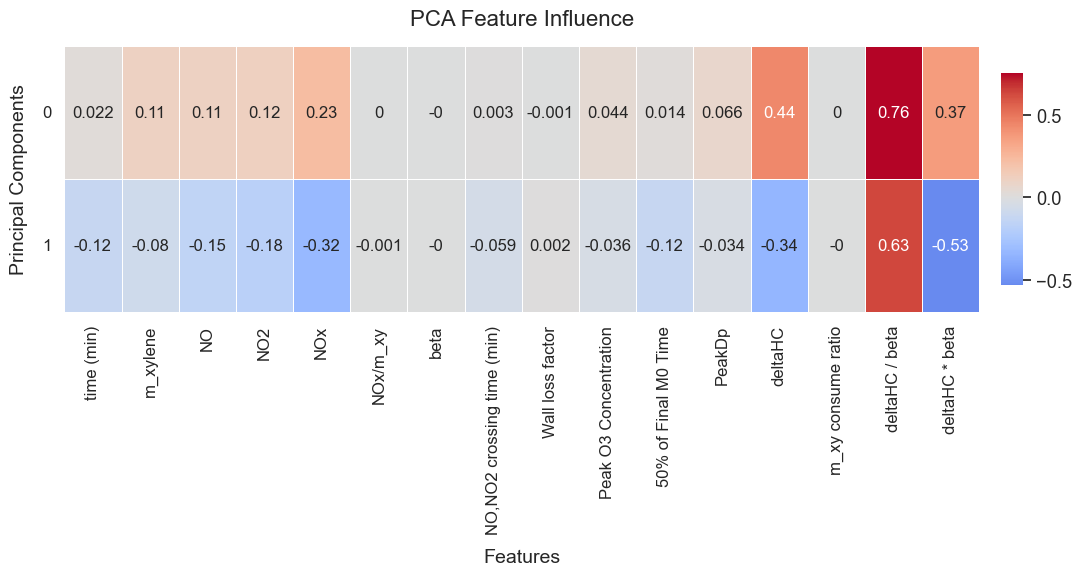

In [8]:
loadings = pca.components_
loadings = np.round(pd.DataFrame(loadings, columns = X.columns), 3)
plt.figure(figsize = (12, 6))
sns.set(font_scale = 1.2)
sns.set_style('whitegrid')
ax = sns.heatmap(loadings, annot = True, cmap = 'coolwarm', center = 0, linewidths = 0.5,
            cbar_kws = {'shrink': 0.8, 'aspect': 10, 'pad': 0.02},
            annot_kws = {'fontsize': 12})

ax.tick_params(axis = 'both', labelsize = 12)
ax.set_title('PCA Feature Influence', fontsize = 16, pad = 15)
ax.set_xlabel('Features', fontsize = 14, labelpad = 10)
ax.set_ylabel('Principal Components', fontsize = 14, labelpad = 10)

ax.yaxis.set_ticklabels(ax.yaxis.get_ticklabels(), rotation=0, ha='right')

plt.tight_layout()
plt.show()

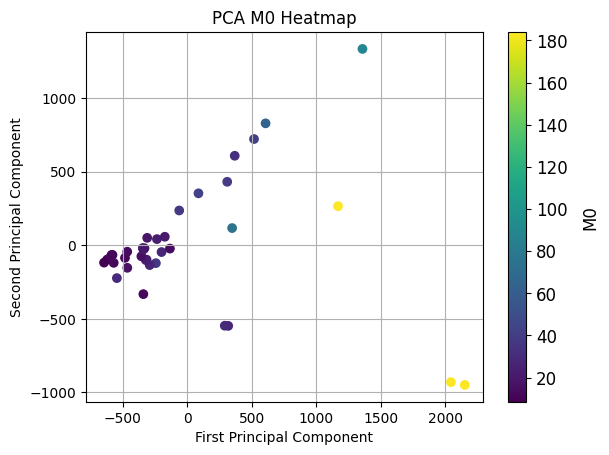

In [4]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y.iloc[:, 0], cmap = 'viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA M0 Heatmap')
cbar = plt.colorbar()
cbar.set_label("M0", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)
plt.grid()
plt.show()


In [19]:
# maybe do M0 search
# reverse PCA
pca.inverse_transform(X_pca[X_pca[:, 0] > 2000])

array([[7.39679882e+02, 4.01417088e+02, 4.25987800e+02, 4.57989734e+02,
        8.83977534e+02, 2.69502677e+00, 1.01279325e+00, 1.09308502e+02,
        2.67272996e+00, 2.96534519e+02, 3.37681874e+02, 3.11845357e+02,
        1.62487766e+03, 4.14153948e+00, 1.70235473e+03, 1.52653582e+03],
       [7.44332878e+02, 4.14726217e+02, 4.40593458e+02, 4.73741575e+02,
        9.14335033e+02, 2.75415007e+00, 1.01897940e+00, 1.10815156e+02,
        2.55988717e+00, 3.01957575e+02, 3.41389662e+02, 3.19644501e+02,
        1.67915736e+03, 4.15736919e+00, 1.77167372e+03, 1.57676641e+03]])

In [18]:
dir(pca)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_fit',
 '_fit_full',
 '_fit_svd_solver',
 '_fit_truncated',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_n_features_out',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_validate_data',
 '_validate_params',
 'components_',
 'copy',
 'explained_variance_',
 'explained_variance_ratio_',
 'feature_names_in_',
 'fit',
 'fit_transform',
 'get_covariance',
 'get_feature_names_out',
 'get_params',
 'get_preci

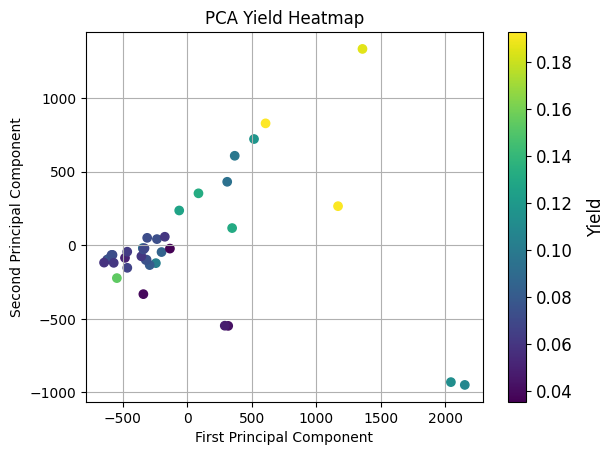

In [5]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y.iloc[:, 1], cmap = 'viridis')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Yield Heatmap')
cbar = plt.colorbar()
cbar.set_label("Yield", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)
plt.grid()
plt.show()

# t-SNE

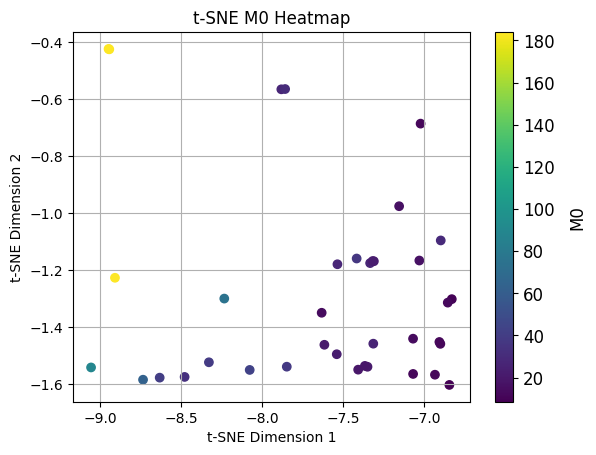

In [6]:
tsne = TSNE(n_components = 2, random_state = 10)

X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.iloc[:, 0], cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE M0 Heatmap')
cbar = plt.colorbar()
cbar.set_label("M0", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)
plt.grid()
plt.show()

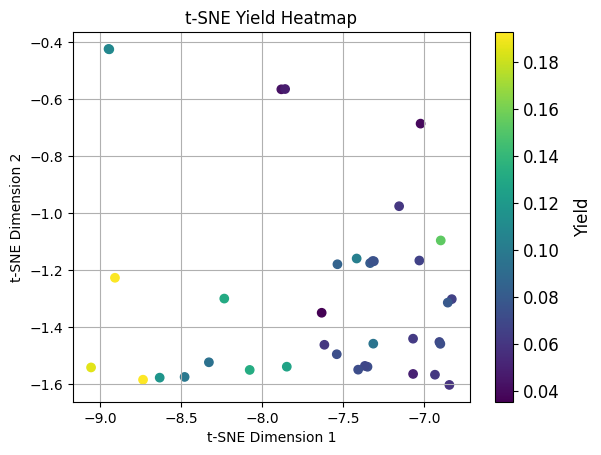

In [7]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y.iloc[:, 1], cmap='viridis')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Yield Heatmap')
cbar = plt.colorbar()
cbar.set_label("Yield", fontsize=12, labelpad=10)
cbar.ax.tick_params(labelsize=12)
plt.grid()
plt.show()